In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Using Neural Network

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import StandardScaler
df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]
scaler = StandardScaler()
df_features = scaler.fit_transform(X=df_features)

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_targets = df.species.to_numpy().reshape(-1,1)
df_targets = encoder.fit_transform(df_targets)
df_targets = df_targets.toarray()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_targets, test_size=0.33, random_state=42)

In [7]:
# modeling 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import backend as K

In [8]:
dimData = X_train.shape[1]
nClasses = y_train.shape[1]
advanced_act = LeakyReLU(alpha=.003)
model_reg = Sequential()
model_reg.add(Dense(10, activation= advanced_act , input_shape=(dimData,)))
model_reg.add(Dense(nClasses, activation='softmax'))


In [9]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.52964497, -0.14405191, -0.5964885 ,  0.5696993 , -0.56493175,
         -0.00472301, -0.13311124,  0.5523834 ,  0.654057  ,  0.3882934 ],
        [-0.20556757,  0.6103362 ,  0.22813165,  0.49973893,  0.35814393,
          0.41397333, -0.06460875,  0.28666526,  0.60092413,  0.0141989 ],
        [-0.2400822 ,  0.3902861 ,  0.41244066, -0.6310808 ,  0.12702   ,
          0.11768585,  0.1588875 ,  0.6412214 ,  0.26842618, -0.38419297],
        [-0.37062496,  0.54186296,  0.06355864,  0.50152516,  0.08914208,
         -0.15979666, -0.10713333, -0.09284949,  0.3227045 ,  0.44292045]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[ 0.04948843,  0.2593645 ,  0.24313909],
        [ 0.08660644,  0.30599958, -0.51236504],
        [ 0.559259

In [10]:
model_reg.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_reg = model_reg.fit(X_train, y_train, batch_size=256, epochs=500, verbose=2,
                        validation_data=(X_test, y_test))

Epoch 1/500
1/1 - 0s - loss: 1.5059 - accuracy: 0.3200 - val_loss: 1.4306 - val_accuracy: 0.3200
Epoch 2/500
1/1 - 0s - loss: 1.4992 - accuracy: 0.3200 - val_loss: 1.4237 - val_accuracy: 0.3200
Epoch 3/500
1/1 - 0s - loss: 1.4925 - accuracy: 0.3200 - val_loss: 1.4169 - val_accuracy: 0.3400
Epoch 4/500
1/1 - 0s - loss: 1.4858 - accuracy: 0.3200 - val_loss: 1.4100 - val_accuracy: 0.3400
Epoch 5/500
1/1 - 0s - loss: 1.4791 - accuracy: 0.3200 - val_loss: 1.4033 - val_accuracy: 0.3400
Epoch 6/500
1/1 - 0s - loss: 1.4725 - accuracy: 0.3200 - val_loss: 1.3965 - val_accuracy: 0.3400
Epoch 7/500
1/1 - 0s - loss: 1.4660 - accuracy: 0.3200 - val_loss: 1.3898 - val_accuracy: 0.3400
Epoch 8/500
1/1 - 0s - loss: 1.4594 - accuracy: 0.3100 - val_loss: 1.3831 - val_accuracy: 0.3800
Epoch 9/500
1/1 - 0s - loss: 1.4529 - accuracy: 0.3100 - val_loss: 1.3765 - val_accuracy: 0.4000
Epoch 10/500
1/1 - 0s - loss: 1.4465 - accuracy: 0.3200 - val_loss: 1.3699 - val_accuracy: 0.3800
Epoch 11/500
1/1 - 0s - loss:

Epoch 85/500
1/1 - 0s - loss: 1.0382 - accuracy: 0.4000 - val_loss: 0.9639 - val_accuracy: 0.5200
Epoch 86/500
1/1 - 0s - loss: 1.0335 - accuracy: 0.4100 - val_loss: 0.9592 - val_accuracy: 0.5200
Epoch 87/500
1/1 - 0s - loss: 1.0288 - accuracy: 0.4100 - val_loss: 0.9545 - val_accuracy: 0.5200
Epoch 88/500
1/1 - 0s - loss: 1.0241 - accuracy: 0.4200 - val_loss: 0.9498 - val_accuracy: 0.5200
Epoch 89/500
1/1 - 0s - loss: 1.0194 - accuracy: 0.4200 - val_loss: 0.9451 - val_accuracy: 0.5200
Epoch 90/500
1/1 - 0s - loss: 1.0147 - accuracy: 0.4200 - val_loss: 0.9405 - val_accuracy: 0.5200
Epoch 91/500
1/1 - 0s - loss: 1.0101 - accuracy: 0.4200 - val_loss: 0.9359 - val_accuracy: 0.5200
Epoch 92/500
1/1 - 0s - loss: 1.0054 - accuracy: 0.4200 - val_loss: 0.9312 - val_accuracy: 0.5200
Epoch 93/500
1/1 - 0s - loss: 1.0008 - accuracy: 0.4200 - val_loss: 0.9267 - val_accuracy: 0.5200
Epoch 94/500
1/1 - 0s - loss: 0.9962 - accuracy: 0.4200 - val_loss: 0.9221 - val_accuracy: 0.5200
Epoch 95/500
1/1 - 0

Epoch 168/500
1/1 - 0s - loss: 0.7114 - accuracy: 0.6400 - val_loss: 0.6461 - val_accuracy: 0.7000
Epoch 169/500
1/1 - 0s - loss: 0.7084 - accuracy: 0.6400 - val_loss: 0.6434 - val_accuracy: 0.7000
Epoch 170/500
1/1 - 0s - loss: 0.7055 - accuracy: 0.6400 - val_loss: 0.6407 - val_accuracy: 0.7000
Epoch 171/500
1/1 - 0s - loss: 0.7026 - accuracy: 0.6400 - val_loss: 0.6381 - val_accuracy: 0.7000
Epoch 172/500
1/1 - 0s - loss: 0.6997 - accuracy: 0.6400 - val_loss: 0.6355 - val_accuracy: 0.7000
Epoch 173/500
1/1 - 0s - loss: 0.6969 - accuracy: 0.6400 - val_loss: 0.6329 - val_accuracy: 0.7000
Epoch 174/500
1/1 - 0s - loss: 0.6940 - accuracy: 0.6500 - val_loss: 0.6303 - val_accuracy: 0.7000
Epoch 175/500
1/1 - 0s - loss: 0.6912 - accuracy: 0.6500 - val_loss: 0.6278 - val_accuracy: 0.7000
Epoch 176/500
1/1 - 0s - loss: 0.6884 - accuracy: 0.6700 - val_loss: 0.6253 - val_accuracy: 0.7000
Epoch 177/500
1/1 - 0s - loss: 0.6857 - accuracy: 0.6700 - val_loss: 0.6228 - val_accuracy: 0.7000
Epoch 178/

Epoch 251/500
1/1 - 0s - loss: 0.5351 - accuracy: 0.8400 - val_loss: 0.4944 - val_accuracy: 0.8200
Epoch 252/500
1/1 - 0s - loss: 0.5336 - accuracy: 0.8400 - val_loss: 0.4932 - val_accuracy: 0.8200
Epoch 253/500
1/1 - 0s - loss: 0.5321 - accuracy: 0.8400 - val_loss: 0.4919 - val_accuracy: 0.8200
Epoch 254/500
1/1 - 0s - loss: 0.5306 - accuracy: 0.8400 - val_loss: 0.4907 - val_accuracy: 0.8200
Epoch 255/500
1/1 - 0s - loss: 0.5291 - accuracy: 0.8400 - val_loss: 0.4895 - val_accuracy: 0.8200
Epoch 256/500
1/1 - 0s - loss: 0.5276 - accuracy: 0.8400 - val_loss: 0.4883 - val_accuracy: 0.8200
Epoch 257/500
1/1 - 0s - loss: 0.5262 - accuracy: 0.8400 - val_loss: 0.4871 - val_accuracy: 0.8200
Epoch 258/500
1/1 - 0s - loss: 0.5247 - accuracy: 0.8400 - val_loss: 0.4859 - val_accuracy: 0.8200
Epoch 259/500
1/1 - 0s - loss: 0.5233 - accuracy: 0.8400 - val_loss: 0.4847 - val_accuracy: 0.8200
Epoch 260/500
1/1 - 0s - loss: 0.5219 - accuracy: 0.8400 - val_loss: 0.4835 - val_accuracy: 0.8200
Epoch 261/

Epoch 334/500
1/1 - 0s - loss: 0.4353 - accuracy: 0.8500 - val_loss: 0.4124 - val_accuracy: 0.8000
Epoch 335/500
1/1 - 0s - loss: 0.4344 - accuracy: 0.8500 - val_loss: 0.4115 - val_accuracy: 0.8000
Epoch 336/500
1/1 - 0s - loss: 0.4334 - accuracy: 0.8500 - val_loss: 0.4107 - val_accuracy: 0.8200
Epoch 337/500
1/1 - 0s - loss: 0.4325 - accuracy: 0.8500 - val_loss: 0.4099 - val_accuracy: 0.8200
Epoch 338/500
1/1 - 0s - loss: 0.4315 - accuracy: 0.8500 - val_loss: 0.4091 - val_accuracy: 0.8200
Epoch 339/500
1/1 - 0s - loss: 0.4306 - accuracy: 0.8500 - val_loss: 0.4083 - val_accuracy: 0.8200
Epoch 340/500
1/1 - 0s - loss: 0.4297 - accuracy: 0.8500 - val_loss: 0.4075 - val_accuracy: 0.8200
Epoch 341/500
1/1 - 0s - loss: 0.4287 - accuracy: 0.8500 - val_loss: 0.4067 - val_accuracy: 0.8200
Epoch 342/500
1/1 - 0s - loss: 0.4278 - accuracy: 0.8500 - val_loss: 0.4059 - val_accuracy: 0.8200
Epoch 343/500
1/1 - 0s - loss: 0.4269 - accuracy: 0.8500 - val_loss: 0.4051 - val_accuracy: 0.8200
Epoch 344/

Epoch 417/500
1/1 - 0s - loss: 0.3683 - accuracy: 0.8700 - val_loss: 0.3524 - val_accuracy: 0.8200
Epoch 418/500
1/1 - 0s - loss: 0.3676 - accuracy: 0.8700 - val_loss: 0.3517 - val_accuracy: 0.8200
Epoch 419/500
1/1 - 0s - loss: 0.3669 - accuracy: 0.8700 - val_loss: 0.3511 - val_accuracy: 0.8200
Epoch 420/500
1/1 - 0s - loss: 0.3662 - accuracy: 0.8700 - val_loss: 0.3505 - val_accuracy: 0.8200
Epoch 421/500
1/1 - 0s - loss: 0.3656 - accuracy: 0.8700 - val_loss: 0.3498 - val_accuracy: 0.8200
Epoch 422/500
1/1 - 0s - loss: 0.3649 - accuracy: 0.8700 - val_loss: 0.3492 - val_accuracy: 0.8200
Epoch 423/500
1/1 - 0s - loss: 0.3642 - accuracy: 0.8700 - val_loss: 0.3486 - val_accuracy: 0.8200
Epoch 424/500
1/1 - 0s - loss: 0.3635 - accuracy: 0.8700 - val_loss: 0.3479 - val_accuracy: 0.8200
Epoch 425/500
1/1 - 0s - loss: 0.3629 - accuracy: 0.8700 - val_loss: 0.3473 - val_accuracy: 0.8200
Epoch 426/500
1/1 - 0s - loss: 0.3622 - accuracy: 0.8700 - val_loss: 0.3467 - val_accuracy: 0.8200
Epoch 427/

Epoch 500/500
1/1 - 0s - loss: 0.3179 - accuracy: 0.8800 - val_loss: 0.3045 - val_accuracy: 0.8400


Text(0.5, 1.0, 'Loss Curves')

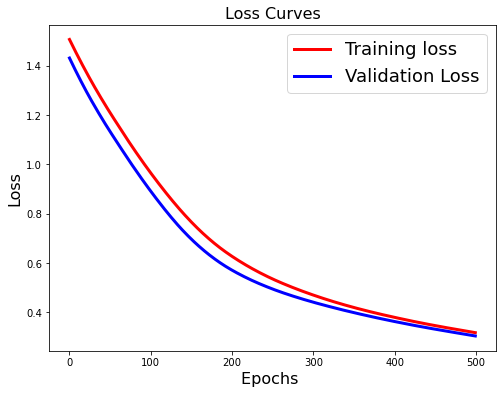

In [11]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['loss'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

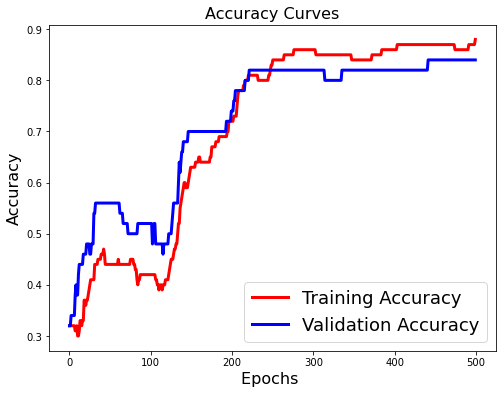

In [12]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Using Genetic Algorithm

In [13]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.46949238, -0.32495528, -0.85275894,  0.07081765, -0.9537551 ,
          0.26867086,  0.15417379,  0.53734523,  0.513882  ,  0.28194538],
        [-0.5398524 ,  0.55179954,  0.4823455 ,  0.74548876,  0.7419209 ,
          0.5163107 , -0.07284842, -0.20744534,  0.43228257, -0.49649936],
        [-0.14252993,  0.20271489,  0.12821668, -1.0923997 , -0.330515  ,
          0.53677607,  0.60410017,  0.92619926,  0.10389808, -0.5289703 ],
        [-0.37549207,  0.33899853, -0.2270134 ,  0.04108237, -0.37842387,
          0.3150417 ,  0.45525452,  0.11511677,  0.1453941 ,  0.24448852]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.40007073, -0.192267  ,  0.3722228 ,  0.3655311 ,  0.11981755,
         0.0060191 , -0.03928453,  0.50969285, -0.13269325,  0.06607839],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[

In [14]:
# creating  population with random weights
population_size = 50
# W1 size(4,10)  ip-hidden
# W2 size (10,)  act hidden
# W3 size (10,3) hidden-output
# W4 size (3) output act

# generate this for 50 population
W1_shape = K.eval(model_reg.weights[0]).shape
W2_shape = K.eval(model_reg.weights[1]).shape
W3_shape = K.eval(model_reg.weights[2]).shape
W4_shape = K.eval(model_reg.weights[3]).shape

W1 =np.random.randn(W1_shape[0],W1_shape[1])
W2 =np.random.randn(W2_shape[0])
W3 =np.random.randn(W3_shape[0],W3_shape[1])
W4 =np.random.randn(W4_shape[0])


In [15]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.46949238, -0.32495528, -0.85275894,  0.07081765, -0.9537551 ,
          0.26867086,  0.15417379,  0.53734523,  0.513882  ,  0.28194538],
        [-0.5398524 ,  0.55179954,  0.4823455 ,  0.74548876,  0.7419209 ,
          0.5163107 , -0.07284842, -0.20744534,  0.43228257, -0.49649936],
        [-0.14252993,  0.20271489,  0.12821668, -1.0923997 , -0.330515  ,
          0.53677607,  0.60410017,  0.92619926,  0.10389808, -0.5289703 ],
        [-0.37549207,  0.33899853, -0.2270134 ,  0.04108237, -0.37842387,
          0.3150417 ,  0.45525452,  0.11511677,  0.1453941 ,  0.24448852]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.40007073, -0.192267  ,  0.3722228 ,  0.3655311 ,  0.11981755,
         0.0060191 , -0.03928453,  0.50969285, -0.13269325,  0.06607839],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[

In [16]:
print(W1)
print(W2)
print(W3)
print(W4)

[[ 0.47866861 -0.0430659   1.08146171  1.28503286 -0.451635   -0.17500603
   0.26841471 -1.25029824  0.06921483  0.10206788]
 [ 0.89836494 -0.87100764  0.14910438  0.60358303  0.38753644  0.14589579
   0.68108603 -0.26235298 -0.08415284  1.09984458]
 [-0.51721517  0.5771793  -1.19941135 -1.26972285 -0.93948702  1.19921002
  -0.11586497  0.81088775 -1.12606105  0.83952508]
 [-1.37615002  1.79919426 -1.60350373 -0.15914362  0.69474104  0.01171218
   0.06885987 -0.36207861 -0.99940338  0.15324054]]
[-0.43587235 -1.25475921 -0.3368539  -0.10595086  1.78318323 -0.05743341
  1.08665612  0.32302599 -1.8884581  -1.13286105]
[[-0.26329372 -0.3139932  -1.12292517]
 [ 0.7345521  -0.89857634 -0.43371663]
 [-0.63505164 -1.63532914 -1.3436717 ]
 [-0.09421971 -0.10134519 -0.91524099]
 [-0.41667364 -0.68063068  0.15781615]
 [-0.53896834 -0.67578153 -1.10749172]
 [-0.30724713 -0.51317578  0.19602086]
 [ 0.4994403   0.73554635  2.0766205 ]
 [-0.54405276  0.32027872  1.21915128]
 [ 0.14982426 -1.08969299

In [17]:
class Gene:
    def __init__(self,W1_shape,W2_shape,W3_shape,W4_shape):
        self.W1 =np.random.randn(W1_shape[0],W1_shape[1])
        self.W2 =np.random.randn(W2_shape[0])
        self.W3 =np.random.randn(W3_shape[0],W3_shape[1])
        self.W4 =np.random.randn(W4_shape[0])
        
    def show_gene(self):
        print(self.W1)
        print(self.W2)
        print(self.W3)
        print(self.W4)
        

In [38]:
class genetic_algo:
    def __init__(self,pop_size):
        self.popualtion_size = pop_size
        self.gene = []
        self.fitness_score = {}
        
    # generate population
    def generate_population(self,W1_shape,W2_shape,W3_shape,W4_shape):
        for i in range(self.popualtion_size):
            self.gene.append(Gene(W1_shape,W2_shape,W3_shape,W4_shape))
    
    # set weight
    def set_model_weights(self,model1,W1,W2,W3,W4):
        model1.layers[0].set_weights([W1,W2])
        model1.layers[1].set_weights([W3,W4])
        return model1
        
    #Foward propagate function
    def forward_propagate(self,model,X_train,y_train):
        
        for pop in range(self.popualtion_size):
            model = self.set_model_weights(model,self.gene[pop].W1,self.gene[pop].W2,self.gene[pop].W3,self.gene[pop].W4)
            step=0
            total_loss = 0
            loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
            for x_batch_train, y_batch_train in zip(X_train,y_train):
                logits = model(x_batch_train.reshape(1,-1))
                y_true = y_batch_train
                count=0
                for i in range(len(y_true)):
                    if y_true[i]==1:
                        break
                    count+=1
                loss_value = loss_fn(count, logits)
                total_loss+=loss_value
                #print("Training loss at step %d: %.4f" % (step, float(loss_value)))
                step+=1
            avg_loss = total_loss/len(X_train)
            print(" Gene %d: Average trainning loss is %f"%(pop,avg_loss))
            self.fitness_score[pop]=avg_loss
        return self.fitness_score
    
    #Natural_Selection
    def natural_selection(self,selection_percent,size):
        fitness = dict(sorted(self.fitness_score.items(), key=lambda item: item[1]))
        fitness_items = fitness.items()
        selection_range = int(selection_percent/100*size)
        selected_dict = list(fitness_items)[:selection_range]
        selected_dict = dict(selected_dict)
        return selected_dict # best genes are selected
        
    
    #Reproduction
    
    
    #Mutuation

In [32]:
Population = genetic_algo(50)

In [33]:
Population.generate_population(W1_shape,W2_shape,W3_shape,W4_shape)

In [34]:
fitness = Population.forward_propagate(model_reg,X_train,y_train)

 Gene 0: Average trainning loss is 1.173604
 Gene 1: Average trainning loss is 1.340662
 Gene 2: Average trainning loss is 1.313384
 Gene 3: Average trainning loss is 0.960299
 Gene 4: Average trainning loss is 1.092472
 Gene 5: Average trainning loss is 0.880630
 Gene 6: Average trainning loss is 1.334977
 Gene 7: Average trainning loss is 1.055015
 Gene 8: Average trainning loss is 1.273267
 Gene 9: Average trainning loss is 1.204482
 Gene 10: Average trainning loss is 1.174381
 Gene 11: Average trainning loss is 1.228734
 Gene 12: Average trainning loss is 1.346739
 Gene 13: Average trainning loss is 1.186738
 Gene 14: Average trainning loss is 1.245896
 Gene 15: Average trainning loss is 1.472547
 Gene 16: Average trainning loss is 1.152997
 Gene 17: Average trainning loss is 1.113111
 Gene 18: Average trainning loss is 0.953403
 Gene 19: Average trainning loss is 1.121431
 Gene 20: Average trainning loss is 0.922758
 Gene 21: Average trainning loss is 1.280039
 Gene 22: Average tr

In [35]:
Population.natural_selection(10,len(X_train))

{35: <tf.Tensor: shape=(), dtype=float32, numpy=0.85145235>,
 5: <tf.Tensor: shape=(), dtype=float32, numpy=0.88062996>,
 20: <tf.Tensor: shape=(), dtype=float32, numpy=0.9227575>,
 18: <tf.Tensor: shape=(), dtype=float32, numpy=0.95340323>,
 3: <tf.Tensor: shape=(), dtype=float32, numpy=0.9602988>,
 28: <tf.Tensor: shape=(), dtype=float32, numpy=0.97123176>,
 29: <tf.Tensor: shape=(), dtype=float32, numpy=1.0108151>,
 42: <tf.Tensor: shape=(), dtype=float32, numpy=1.0526448>,
 7: <tf.Tensor: shape=(), dtype=float32, numpy=1.0550152>,
 39: <tf.Tensor: shape=(), dtype=float32, numpy=1.0905308>}

In [36]:
fitness = dict(sorted(fitness.items(), key=lambda item: item[1]))

In [37]:
fitness

{35: <tf.Tensor: shape=(), dtype=float32, numpy=0.85145235>,
 5: <tf.Tensor: shape=(), dtype=float32, numpy=0.88062996>,
 20: <tf.Tensor: shape=(), dtype=float32, numpy=0.9227575>,
 18: <tf.Tensor: shape=(), dtype=float32, numpy=0.95340323>,
 3: <tf.Tensor: shape=(), dtype=float32, numpy=0.9602988>,
 28: <tf.Tensor: shape=(), dtype=float32, numpy=0.97123176>,
 29: <tf.Tensor: shape=(), dtype=float32, numpy=1.0108151>,
 42: <tf.Tensor: shape=(), dtype=float32, numpy=1.0526448>,
 7: <tf.Tensor: shape=(), dtype=float32, numpy=1.0550152>,
 39: <tf.Tensor: shape=(), dtype=float32, numpy=1.0905308>,
 4: <tf.Tensor: shape=(), dtype=float32, numpy=1.0924721>,
 30: <tf.Tensor: shape=(), dtype=float32, numpy=1.0925602>,
 17: <tf.Tensor: shape=(), dtype=float32, numpy=1.1131105>,
 36: <tf.Tensor: shape=(), dtype=float32, numpy=1.117161>,
 19: <tf.Tensor: shape=(), dtype=float32, numpy=1.1214315>,
 32: <tf.Tensor: shape=(), dtype=float32, numpy=1.1321607>,
 22: <tf.Tensor: shape=(), dtype=float32,